# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Ответ:** 

1. Посмотрим по количеству классификаторов $F$, которые ошиблись:

$F=0$ : это произойдет с вероятностью $(1-p)^3$, но ошибки не может быть в таком случае, поэтому $p_0 = 0$.

$F=1$ : каждое из множества таких событий произойдет с вероятностью $p(1-p)^2$, а всего событий, давших неправильный ответ, будет столько, сколько выполнено неравенств $$\sum_{i\in A,\,\, A\subset I,\,\,|A|=1}w_i > \sum_{i\in I\setminus A}w_i$$

В нашем случае таких нет, и $p_1=0$.

$F=2$ : каждое из множества таких событий произойдет с вероятностью $p^2(1-p)$, а всего событий, давших неправильный ответ, будет столько, сколько выполнено неравенств $$\sum_{i\in A,\,\, A\subset I,\,\,|A|=2}w_i > \sum_{i\in I\setminus A}w_i$$

В нашем случае все три неравенства подходят, значит, $p_2 = 3p^2(1-p)$.

$F=3$ : все ошибаются, такое произойдет с $p_3 = p^3$.

Итог: $p_{error} = p_0 + p_1 + p_2 + p_3 = 3p^2(1-p) + p^3$.
___
2. Аналогично:

$F=0$ : $p_0 = 0$.

$F=1$ : одно из неравенств выполняется: $$\sum_{i\in A,\,\, A\subset I,\,\,|A|=1}w_i > \sum_{i\in I\setminus A}w_i$$

поэтому $p_1=p(1-p)^2$.

$F=2$ : Два неравенства подходят, значит, $p_2 = 2p^2(1-p)$.

$F=3$ : все ошибаются, такое произойдет с $p_3 = p^3$.

Итог: $p_{error} = p_0 + p_1 + p_2 + p_3 = p(1-p)^2 + 2p^2(1-p) + p^3 = p$.

Результат работы зависит лишь от решения второго алгоритма.

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

$$b_N(x) = \arg\min_{b\in\mathbf{A}}\sum_{i=1}^{l}-(s_i \log{b(x_i)}+(1-s_i)\log{(1-b(x_i)})$$, где

$$s_i = -\cfrac{\partial L}{\partial z_i} = -\frac{y}{z_i} + \frac{1-y}{1-z_i}$$

$$z_i = a_{N-1}(x_i) = \sum_{n=0}^{N-1}\gamma_nb_n(x_i)\,\,\,\,\,\,\,\text{- композиция}$$.

$$\gamma_N = \arg\min_{\gamma\in\mathbb{R}}\sum_{i=1}^{l}L(y_i, a_{N-1}(x_i) + \gamma b_n(x_i))$$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

In [ ]:
# Ваш ответ здесь

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [392]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm_notebook as tqdm
from scipy.stats import mode
import numpy as np
import random
import numbers # for isinstance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [395]:
def bagging(X, y, size):
    #Implement random sampling here
    rand_indices = np.random.randint(X.shape[0], size=size)
#     print('bagging ind:', rand_indices)
    sample_X, sample_y = X[rand_indices], y[rand_indices]
    return sample_X, sample_y

In [398]:
def rsm_indices(n, max_features):
    return list(set(random.sample(range(n), k=max_features)))

In [424]:
class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees=10, max_depth=np.inf, max_features=None, 
                 criterion='gini', stupid=False):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.stupid = stupid
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        X_train, y_train = np.array(X_train), np.array(y_train)
        
        
        if self.max_depth == np.inf:
            self._max_depth_param = None
        else:
            self._max_depth_param = self.max_depth
        
        self.trees = []
        self._max_features_num = X_train.shape[1]
        if isinstance(self.max_features, int):
            self._max_features_num = self.max_features
        elif isinstance(self.max_features, numbers.Real):
            self._max_features_num = int(self.max_features * X_train.shape[1])
        elif isinstance(self.max_features, str):
            if self.max_features == 'sqrt':
                self._max_features_num = int(X_train.shape[1]**0.5)
            elif self.max_features == 'log2':
                self._max_features_num = int(np.log2(X_train.shape[1]))           
        self.max_features_param = self.max_features
        if self.stupid == True:
            for i in np.arange(self.num_trees):
                tree = DecisionTreeClassifier(criterion=self.criterion, 
                                              max_depth=self._max_depth_param,
                                              max_features=None)
                rsm_ind = rsm_indices(X_train.shape[1], self._max_features_num)
                X_rsm = X_train[rsm_ind, :]
                X_bag, y_bag = bagging(X_rsm, y_train, X_train.shape[0])

                tree.fit(X_bag, y_bag)#X_bag_rsm, y_bag_rsm)
                self.trees.append(tree)
        else:
            for i in np.arange(self.num_trees):
                tree = DecisionTreeClassifier(criterion=self.criterion, 
                                              max_depth=self._max_depth_param,
                                              max_features=self.max_features_param)
                X_bag, y_bag = bagging(X_train, y_train, X_train.shape[0])

                tree.fit(X_bag, y_bag)
                self.trees.append(tree)
            
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        X_test = np.array(X_test)
        y_pred = np.zeros((X_test.shape[0], self.num_trees))
#         print(y_pred.shape)
        for i in np.arange(self.num_trees):
            y_pred[:, i] = self.trees[i].predict(X_test)
        return mode(y_pred, axis=1).mode.ravel()

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [425]:
from urllib.request import urlopen
text = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names') # it's a file like object and works just like a file
print(str(text.read().decode('UTF-8')))

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [426]:
import pandas as pd
winedata = pd.read_csv('https://archive.ics.uci.edu/ml/'+
                       'machine-learning-databases/wine/wine.data',
                       names=['class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity',
                                'Magnesium', 'Total phenols', 'Flavanoids',
                                'Nonflavanoid', 'Proanthocyanins', 'Color',
                                'Hue', 'OD', 'Proline'])
print(winedata.shape)
winedata.sample(5)

(178, 14)


,class,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD,Proline
154,3,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
94,2,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660


In [427]:
X_train, X_test, y_train, y_test = train_test_split(winedata.drop(['class'], axis=1), 
                                                    winedata['class'],
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [428]:
from sklearn.metrics import accuracy_score

In [429]:
rf_clf = RandomForest(num_trees = 77)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(list(pred[:20]))
print(list(y_test[:20]))
print('acc:', accuracy_score(pred, y_test))

[1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0]
[1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2]
acc: 0.9722222222222222


In [430]:
pred.shape

(36,)

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

**Ответ:** не видны.

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [431]:
from sklearn.ensemble import RandomForestClassifier

HBox(children=(IntProgress(value=0, max=69), HTML(value='')))

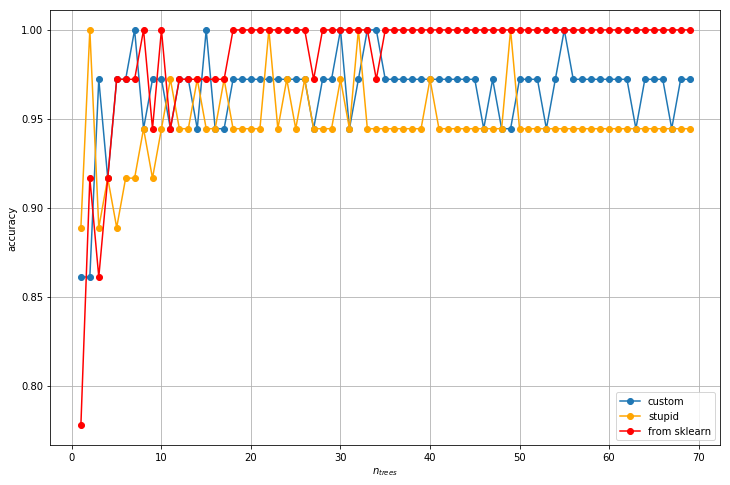

In [436]:
num_trees_grid = np.arange(1, 70)
accuracy_grid_custom = []
accuracy_grid_stupid = []
accuracy_grid_sklearn = []
for ntrees in tqdm(num_trees_grid):
    rf_clf = RandomForest(num_trees=ntrees)
    rf_clf.fit(X_train, y_train)
    pred_custom = rf_clf.predict(X_test)
    accuracy_grid_custom.append(accuracy_score(pred_custom, y_test))
    
    sklearn_clf = RandomForestClassifier(n_estimators=ntrees)
    sklearn_clf.fit(X_train, y_train)
    pred_sklearn = sklearn_clf.predict(X_test)
    accuracy_grid_sklearn.append(accuracy_score(pred_sklearn, y_test))
    
    rf_clf_stupid = RandomForest(num_trees=ntrees, stupid=True)
    rf_clf_stupid.fit(X_train, y_train)
    pred_stupid = rf_clf_stupid.predict(X_test)
    accuracy_grid_stupid.append(accuracy_score(pred_stupid, y_test))

plt.figure(figsize=(12, 8))
plt.plot(num_trees_grid, accuracy_grid_custom, marker='o', label='custom')
plt.plot(num_trees_grid, accuracy_grid_stupid, marker='o', label='stupid', color='orange')
plt.plot(num_trees_grid, accuracy_grid_sklearn, marker='o', label='from sklearn', color='red')
plt.xlabel('$n_{trees}$')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()